## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load data

In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
48408,0.72,Very Good,H,SI2,62.6,53.0,1970,5.75,5.78,3.61
2506,0.71,Ideal,F,VS1,61.1,56.0,3199,5.71,5.74,3.50
18119,1.21,Premium,E,SI1,62.6,58.0,7334,6.82,6.79,4.26
18819,1.54,Premium,G,SI2,59.4,60.0,7707,7.49,7.52,4.46
36608,0.34,Very Good,E,SI2,62.5,59.0,477,4.43,4.46,2.78


In [42]:
len(Diamonds)

53940

## Goal: Use carat, cut, color, and clarity to predict the price of diamonds.

## Data Wrangling

### First we need to recode cut, color, and clarity into some sort of numbered variables.

In [12]:
str(Diamonds.cut)

"48408    Very Good\n2506         Ideal\n18119      Premium\n18819      Premium\n36608    Very Good\n           ...    \n20000      Premium\n52426        Ideal\n39121      Premium\n12434        Ideal\n5456     Very Good\nName: cut, Length: 53940, dtype: category\nCategories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']"

In [13]:
str(Diamonds.color)

"48408    H\n2506     F\n18119    E\n18819    G\n36608    E\n        ..\n20000    J\n52426    I\n39121    G\n12434    J\n5456     I\nName: color, Length: 53940, dtype: category\nCategories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']"

In [14]:
str(Diamonds.clarity)

"48408     SI2\n2506      VS1\n18119     SI1\n18819     SI2\n36608     SI2\n         ... \n20000     SI2\n52426    VVS2\n39121     VS2\n12434    VVS2\n5456      SI1\nName: clarity, Length: 53940, dtype: category\nCategories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']"

## First Cut

In [15]:
cutDummies = pd.get_dummies(Diamonds['cut'], prefix='cut')

In [17]:
Diamonds = pd.concat([Diamonds, cutDummies], axis = 1)

In [19]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
48408,0.72,Very Good,H,SI2,62.6,53.0,1970,5.75,5.78,3.61,False,False,True,False,False
2506,0.71,Ideal,F,VS1,61.1,56.0,3199,5.71,5.74,3.50,True,False,False,False,False
18119,1.21,Premium,E,SI1,62.6,58.0,7334,6.82,6.79,4.26,False,True,False,False,False
18819,1.54,Premium,G,SI2,59.4,60.0,7707,7.49,7.52,4.46,False,True,False,False,False
36608,0.34,Very Good,E,SI2,62.5,59.0,477,4.43,4.46,2.78,False,False,True,False,False


## Color

In [21]:
colorDummies = pd.get_dummies(Diamonds['color'], prefix='color')

In [22]:
Diamonds = pd.concat([Diamonds, colorDummies], axis = 1)

In [23]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,color_F,color_G,color_H,color_I,color_J
48408,0.72,Very Good,H,SI2,62.6,53.0,1970,5.75,5.78,3.61,...,True,False,False,False,False,False,False,True,False,False
2506,0.71,Ideal,F,VS1,61.1,56.0,3199,5.71,5.74,3.50,...,False,False,False,False,False,True,False,False,False,False
18119,1.21,Premium,E,SI1,62.6,58.0,7334,6.82,6.79,4.26,...,False,False,False,False,True,False,False,False,False,False
18819,1.54,Premium,G,SI2,59.4,60.0,7707,7.49,7.52,4.46,...,False,False,False,False,False,False,True,False,False,False
36608,0.34,Very Good,E,SI2,62.5,59.0,477,4.43,4.46,2.78,...,True,False,False,False,True,False,False,False,False,False


## Clarity

In [24]:
clarityDummies = pd.get_dummies(Diamonds['clarity'], prefix='clarity')

In [25]:
Diamonds = pd.concat([Diamonds, clarityDummies], axis = 1)

In [26]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
48408,0.72,Very Good,H,SI2,62.6,53.0,1970,5.75,5.78,3.61,...,False,False,False,False,False,False,False,False,True,False
2506,0.71,Ideal,F,VS1,61.1,56.0,3199,5.71,5.74,3.50,...,False,False,False,False,False,True,False,False,False,False
18119,1.21,Premium,E,SI1,62.6,58.0,7334,6.82,6.79,4.26,...,False,False,False,False,False,False,False,True,False,False
18819,1.54,Premium,G,SI2,59.4,60.0,7707,7.49,7.52,4.46,...,False,False,False,False,False,False,False,False,True,False
36608,0.34,Very Good,E,SI2,62.5,59.0,477,4.43,4.46,2.78,...,False,False,False,False,False,False,False,False,True,False


### Now, we have to create two arrays (x & y) to feed into the model.

In [28]:
x = Diamonds[['carat', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1']]

In [29]:
y = Diamonds['price']

#### After all of that tedious typing we can run our models now.

## Train-Test-Split learning model

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#### View the output just to make sure things ran alrighty. And to see how much data was used in each set.

In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(37758, 21) (37758,)
(16182, 21) (16182,)


## Running the linear regression

In [32]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Examine Predictions (first with an array I don't quite understand) and then with a scatterplot that makes more sense to me.

In [34]:
predictions = lm.predict(x_test)
predictions

array([4003., 4238., 2999., ..., 7917., 6268., 4855.])

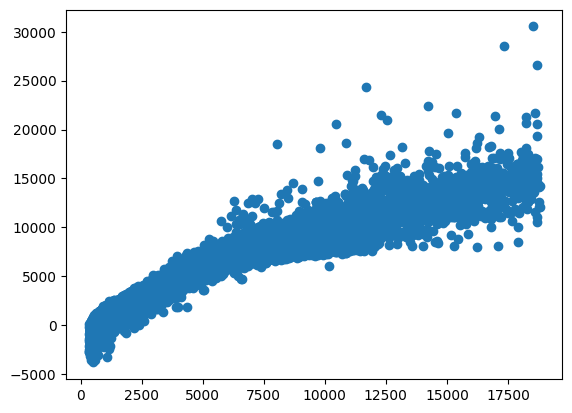

In [35]:
plt.scatter(y_test, predictions)

## That's quite a lot of data, but I think we can sort of see the points forming a general line shape (though quite a fat one).

## Accuracy Score

#### This should help since we had quite a lot of data.

In [36]:
print("Score:", lm.score(x_test, y_test))

Score: 0.914266815746937


### Wow! 91.4% accuracy. Our model is a pretty good predictor.

## Error Examination 
###(We want these numbers as close to 0 as possible.)

### First, Mean Absolute Error (MAE)

In [37]:
metrics.mean_absolute_error(y_test, predictions)

812.1486219255963

### Mean Squared Error (MSE)

In [38]:
metrics.mean_squared_error(y_test, predictions)

1363628.2586206896

### Root Mean Squared Error (RMSE)

In [39]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1167.7449458767483

## Analysis of Errors:

### None of our three metrics were very small. This means we could have introduced some error into our models.

## Cross Validation (K-Fold)

In [40]:
kfold = KFold(n_splits = 5, shuffle = True)
for train, test in kfold.split(x,y):
    print(f'train: {train}, test: {test}')

train: [    1     2     3 ... 53936 53937 53939], test: [    0     5     6 ... 53924 53928 53938]
train: [    0     1     2 ... 53936 53937 53938], test: [    3     9    16 ... 53931 53935 53939]
train: [    0     1     2 ... 53936 53938 53939], test: [    4     8    10 ... 53933 53934 53937]
train: [    0     1     3 ... 53937 53938 53939], test: [    2    11    19 ... 53911 53916 53919]
train: [    0     2     3 ... 53937 53938 53939], test: [    1    13    14 ... 53927 53930 53936]


In [41]:
print(cross_val_score(lm, x, y, cv = 5))

[0.91547089 0.9142574  0.91642778 0.91631855 0.9165254 ]


## Each iteration created a model very similar to the other 4. The models were 91.5%, 91.4%, 91.6%, 91.6%, and 91.7% accurate.